# AI Investment Global South and North Comparison

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data about AI Patents by Country (example)
data = {
    'Country': ['United States', 'China', 'Japan', 'South Korea', 'Germany', 'Brazil', 'Mexico', 'India', 'South Africa', 'Singapore'],
    'AI_Patents_2022': [8900, 7600, 4200, 3100, 2700, 250, 120, 950, 80, 700],
    'Group': ['Global North', 'Global North', 'Global North', 'Global North', 'Global North', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South']
}

df_patents = pd.DataFrame(data)

print(df_patents.head())

         Country  AI_Patents_2022         Group
0  United States             8900  Global North
1          China             7600  Global North
2          Japan             4200  Global North
3    South Korea             3100  Global North
4        Germany             2700  Global North


## Data Cleaning

In [3]:
# Data about GDP per Capita (example)
data_gdp = {
    'Country': ['United States', 'China', 'Japan', 'South Korea', 'Germany', 'Brazil', 'Mexico', 'India', 'South Africa', 'Singapore'],
    'GDP_per_capita': [76300, 12900, 49100, 33500, 51300, 8100, 11500, 2600, 6700, 87800]
}

df_gdp = pd.DataFrame(data_gdp)

# Merge the two DataFrames into one
df_full = pd.merge(df_patents, df_gdp, on='Country')

# Display the new DataFrame
print(df_full)

         Country  AI_Patents_2022         Group  GDP_per_capita
0  United States             8900  Global North           76300
1          China             7600  Global North           12900
2          Japan             4200  Global North           49100
3    South Korea             3100  Global North           33500
4        Germany             2700  Global North           51300
5         Brazil              250  Global South            8100
6         Mexico              120  Global South           11500
7          India              950  Global South            2600
8   South Africa               80  Global South            6700
9      Singapore              700  Global South           87800


## Initial Analysis: AI Patents and GDP Correlation 2022

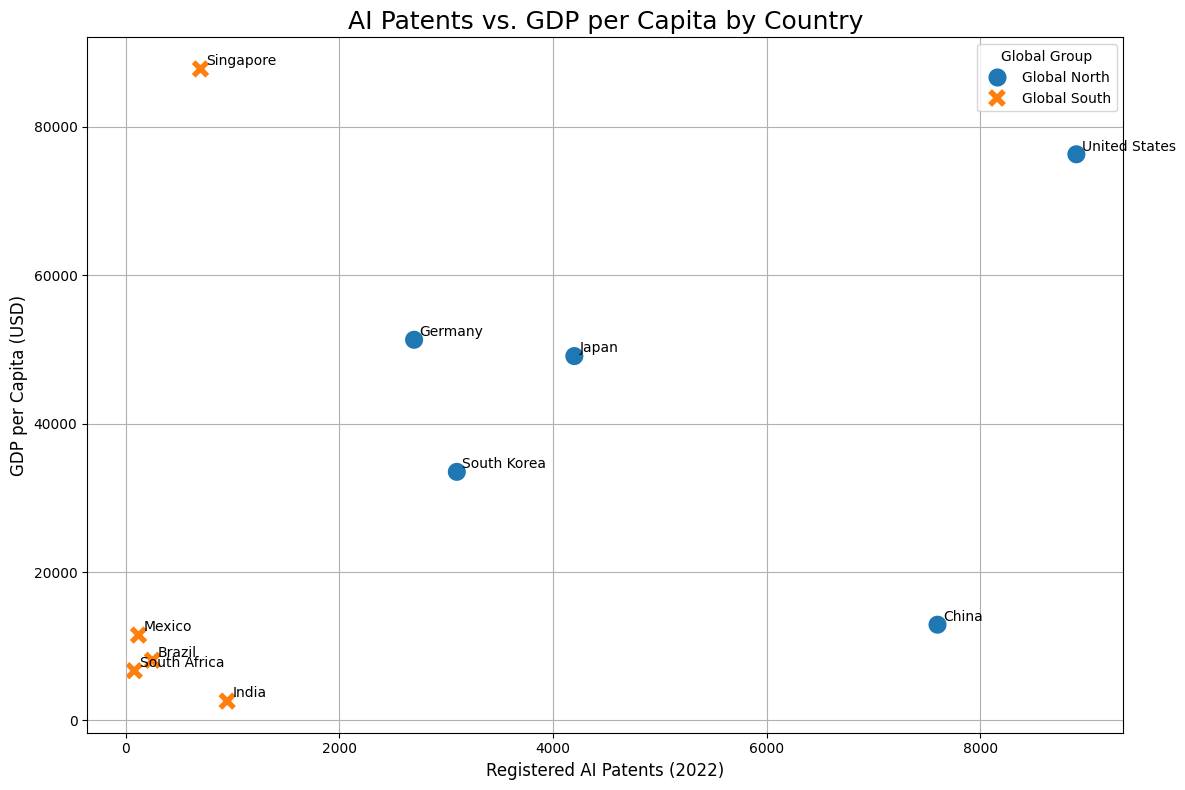

In [4]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='AI_Patents_2022',
    y='GDP_per_capita',
    hue='Group',
    data=df_full,
    s=200,
    style='Group'
)

# Add labels for each point
for i, row in df_full.iterrows():
    plt.text(row['AI_Patents_2022'] + 50, row['GDP_per_capita'] + 500, row['Country'])

plt.title('AI Patents vs. GDP per Capita by Country', fontsize=18)
plt.xlabel('Registered AI Patents (2022)', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.legend(title='Global Group')
plt.grid(True)
plt.tight_layout()

plt.show()

## Initial Conclusions: The Strategic Gap

The gap between the Global North and Global South in both economic strength and AI investment is **real and evident**. Global North countries (e.g., USA, Germany, Japan) cluster in the upper part of the graph, exhibiting high GDP per capita and significant AI investment. Conversely, most Global South countries (e.g., Brazil, Mexico, India) cluster in the lower region, with much lower GDP and AI investment.

### The China Anomaly

**China is a fascinating and crucial exception.** China breaks the traditional pattern: its GDP per capita is comparable to countries typically categorized in the Global South (like Brazil or Mexico), yet its **AI patent output is similar to that of major Global North powers** (second only to the US). This is the project's most profound insight.

This demonstrates a key point: a nation can make **AI investment a strategic national priority**, achieving technological leadership regardless of its current GDP per capita ranking.

## Deeper Analysis: Correlation & Group Averages

In [5]:
# Step 1: Calculate the Correlation Coefficient
correlation = df_full['GDP_per_capita'].corr(df_full['AI_Patents_2022'])

print(f"The correlation coefficient between GDP per capita and AI patents is: {correlation:.2f}")

# Calculate the average patents and GDP for each group
group_averages = df_full.groupby('Group').agg(
    Average_AI_Patents=('AI_Patents_2022', 'mean'),
    Average_GDP=('GDP_per_capita', 'mean')
).reset_index()

print("\nGlobal Group Averages:")
print(group_averages)

The correlation coefficient between GDP per capita and AI patents is: 0.36

Global Group Averages:
          Group  Average_AI_Patents  Average_GDP
0  Global North              5300.0      44620.0
1  Global South               420.0      23340.0


## Correlation Analysis

The correlation coefficient of **0.36** indicates a **positive, but weak, correlation**. This means a relationship exists between GDP per capita and the number of patents, but it is **not nearly as strong as initial visual assumptions might suggest**. This weak correlation mathematically reinforces the observation that the relationship is imperfect, largely due to the influence of outliers like China.

### Group Averages

The group averages decisively confirm the identified global gap:

* **Global North** countries average **5,300 AI patents**, which is **12 times more** than the Global South's average of 420.
* The average GDP per capita for the Global North is **$44,620** nearly double the Global South's average of $23,340.

## Temporal Analysis 2015 and 2022

         Country  Year  AI_Patents         Group  GDP_per_capita
0  United States  2015        3100  Global North           56100
1  United States  2022        8900  Global North           76300
2          China  2015        1100  Global North            8100
3          China  2022        7600  Global North           12900
4          Japan  2015        2800  Global North           34700


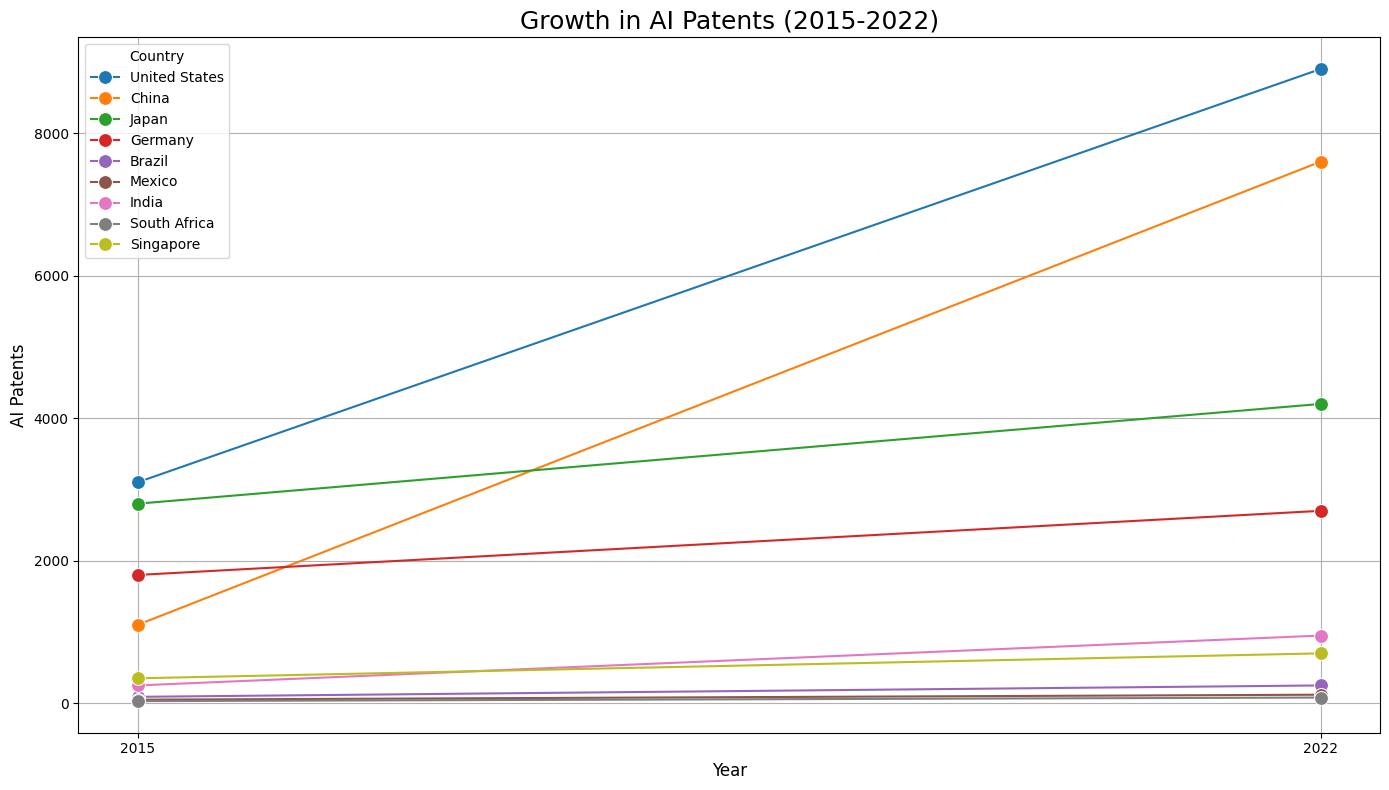

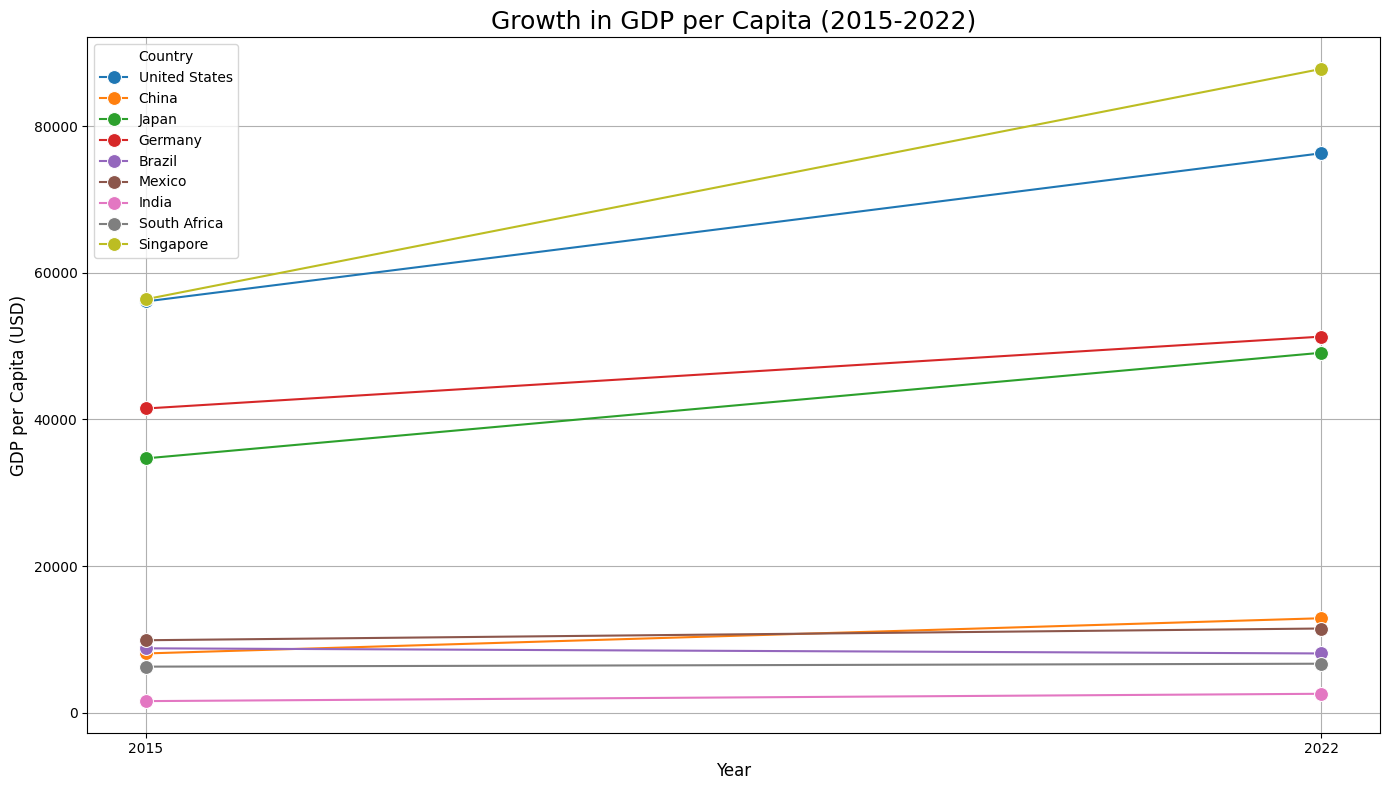

In [6]:
## Temporal Analysis 2015 and 2022

data_temporal = {
    'Country': ['United States', 'United States', 'China', 'China', 'Japan', 'Japan', 'Germany', 'Germany', 'Brazil', 'Brazil', 'Mexico', 'Mexico', 'India', 'India', 'South Africa', 'South Africa', 'Singapore', 'Singapore'],
    'Year': [2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022, 2015, 2022],
    'AI_Patents': [3100, 8900, 1100, 7600, 2800, 4200, 1800, 2700, 90, 250, 50, 120, 250, 950, 30, 80, 350, 700],
    'Group': ['Global North', 'Global North', 'Global North', 'Global North', 'Global North', 'Global North', 'Global North', 'Global North', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South', 'Global South'],
    'GDP_per_capita': [56100, 76300, 8100, 12900, 34700, 49100, 41500, 51300, 8800, 8100, 9900, 11500, 1600, 2600, 6300, 6700, 56400, 87800]
}

df_temporal = pd.DataFrame(data_temporal)

print(df_temporal.head())

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year',
    y='AI_Patents',
    hue='Country',
    data=df_temporal,
    marker='o',
    markersize=10
)

plt.title('Growth in AI Patents (2015-2022)', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('AI Patents', fontsize=12)
plt.xticks([2015, 2022])
plt.grid(True)
plt.tight_layout()

plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(
    x='Year',
    y='GDP_per_capita',
    hue='Country',
    data=df_temporal,
    marker='o',
    markersize=10
)

plt.title('Growth in GDP per Capita (2015-2022)', fontsize=18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP per Capita (USD)', fontsize=12)
plt.xticks([2015, 2022])
plt.grid(True)
plt.tight_layout()

plt.show()

## Conclusions: Temporal Analysis (2015-2022)

### The Singapore Case: Focus vs. Creation

**Singapore** is a perfect example of a high-value, knowledge-based economy. Despite its high GDP, it does not invest in AI patents at the same level as technology giants. This suggests a strategic focus on **adopting and adapting** AI technologies created elsewhere, rather than prioritizing fundamental invention and patenting.

### Growth Dynamics

* **Global North Pattern:** Countries like **Germany and Japan** follow the expected pattern: as their GDP per capita increases, so does their investment in AI. Mature economies with strong technological foundations continue to treat AI investment as a key engine for growth.
* **The Widening Gap in the Global South:** **Brazil, India, and South Africa** show slower growth in both GDP and AI investment. This reinforces the concern of a **widening growth gap** if these nations do not invest more aggressively in emerging technologies.

### China-Mexico Paradox

Despite having very similar GDP growth curves, the difference in patent investment between **China and Mexico** is enormous. This confirms that AI development is not merely a consequence of general economic growth, but a **deliberate national strategic investment decision.** China is aggressively betting on AI as a pillar for future growth, a commitment not seen in other countries with similar GDP per capita.

## R&D Expenditure Analysis

         Country  R&D_Spending_Pct_GDP
0  United States                   3.4
1          China                   2.4
2          Japan                   3.3
3    South Korea                   4.9
4        Germany                   3.1
5         Brazil                   1.3
6         Mexico                   0.4
7          India                   0.7
8   South Africa                   0.8
9      Singapore                   1.9
         Country  AI_Patents_2022         Group  GDP_per_capita  \
0  United States             8900  Global North           76300   
1          China             7600  Global North           12900   
2          Japan             4200  Global North           49100   
3    South Korea             3100  Global North           33500   
4        Germany             2700  Global North           51300   
5         Brazil              250  Global South            8100   
6         Mexico              120  Global South           11500   
7          India              950  

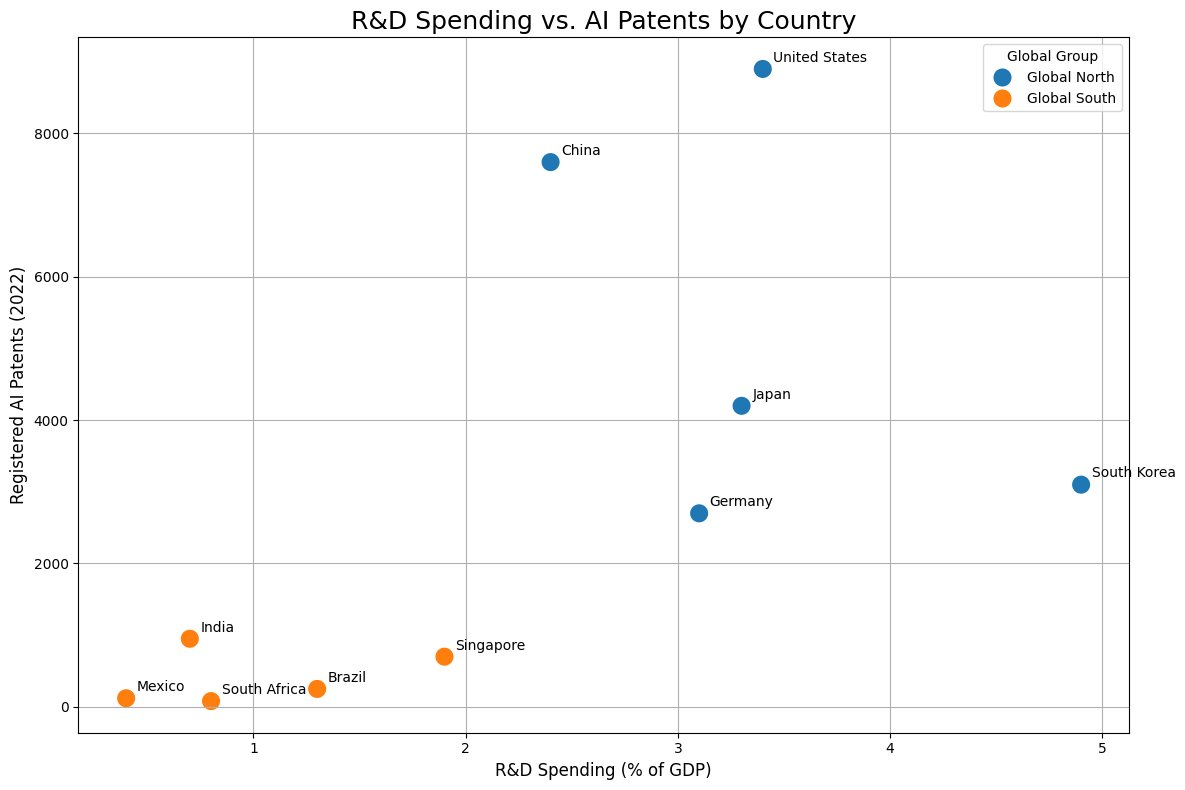

In [7]:
## R&D Expenditure Analysis (R&D as % of GDP)

# This helps us understand if AI investment is part of a broader innovation investment or a focused strategy.

# Data for R&D expenditure as a percentage of GDP (2022)
data_id = {
    'Country': ['United States', 'China', 'Japan', 'South Korea', 'Germany', 'Brazil', 'Mexico', 'India', 'South Africa', 'Singapore'],
    'R&D_Spending_Pct_GDP': [3.4, 2.4, 3.3, 4.9, 3.1, 1.3, 0.4, 0.7, 0.8, 1.9]
}

df_rd = pd.DataFrame(data_id)

print(df_rd)

# Merge the new DataFrame with the complete DataFrame
df_final = pd.merge(df_full, df_rd, on='Country')

# Display the final DataFrame
print(df_final)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='R&D_Spending_Pct_GDP',
    y='AI_Patents_2022',
    hue='Group',
    data=df_final,
    s=200
)

# Add labels to points to identify countries
for i, row in df_final.iterrows():
    plt.text(row['R&D_Spending_Pct_GDP'] + 0.05, row['AI_Patents_2022'] + 100, row['Country'])

plt.title('R&D Spending vs. AI Patents by Country', fontsize=18)
plt.xlabel('R&D Spending (% of GDP)', fontsize=12)
plt.ylabel('Registered AI Patents (2022)', fontsize=12)
plt.legend(title='Global Group')
plt.grid(True)
plt.tight_layout()

plt.show()

In [8]:
# Data Export
df_final.to_csv('AI_Patents_Investment.csv', index=False)

print("File exported successfully!")
print("Look for 'AI_Patents_Investment.csv' in your working folder.")

File exported successfully!
Look for 'AI_Patents_Investment.csv' in your working folder.


## Conclusions: R&D Expenditure

### South Korea: The Investment Surprise

The chart clearly shows that **South Korea** invests the highest percentage of its GDP in R&D. However, its patent count is lower than the US and China. This prompts deeper questions: Is this massive investment focused on other research areas, or is the patenting process less efficient? Given Korea's focus on hardware and consumer tech, it suggests the investment is yielding results, but with a **different innovation focus** than the US and China.

### Investment Efficiency (Japan vs. Germany)

Both **Japan and Germany** invest a similar percentage of their GDP in R&D, but Japan has achieved a significantly higher number of AI patents. This suggests **greater efficiency** in Japan's R&D investment specific to the AI field, indicating its innovation ecosystem is more geared toward intellectual property creation.

### Leadership of the US and China

The graph reinforces previous observations. The **US** remains the clear leader in AI patents, justified by its massive R&D expenditure. Crucially, **China**, while not spending as high a percentage as the US, is **extraordinarily efficient** in converting its R&D spending into AI patents, positioning it very close to the leader. This confirms that their strategic focus on AI is yielding concrete results.

### The Global South Struggle

The low investment and production of **Mexico and South Africa** are clear indicators that the technological gap is also a **strategic investment gap**. Meanwhile, **India**, with less percentage investment than Brazil and Singapore, produces a similar number of patents, potentially indicating higher efficiency but on a much smaller scale.

# FINAL PROJECT CONCLUSION

The analysis of AI development across global economic groups reveals that technological leadership is driven by a complex interplay of wealth, governance, and strategic national focus. The key takeaways from this project are:

### 1. The AI Investment Gap is Systemic

A clear and growing **investment gap** in AI development exists between the Global North and Global South. The Global North dominates AI patent production (averaging 5,300 patents, 12x the South's average), largely supported by higher GDP per capita and significant R&D spending.

### 2. The Strategic Factor Overrules GDP

The **China Anomaly** is the central finding: with a GDP per capita comparable to developing nations, China has strategically prioritized AI, enabling it to surpass many wealthier countries in patent production. This demonstrates that **AI development is a result of deliberate national strategic investment**, not simply a byproduct of overall economic prosperity.

### 3. Efficiency and Focus are Key

The analysis of R&D spending shows that **efficiency matters**. Countries like Japan and China are highly effective at converting R&D dollars into AI patents, while high-spending nations like South Korea appear to have a broader or different technological focus. This highlights the need for nations to align R&D investment specifically toward the strategic goal of AI intellectual property creation.

**In conclusion,** technological leadership in AI is not solely a matter of national wealth. It is a clear reflection of **strategic prioritization, efficient resource allocation, and a national commitment** to technology as a pillar of future growth, setting a challenging but achievable roadmap for the Global South.